## This notebook should show the performance of the models performing the best in GridSearch.

In [26]:
import pickle
import numpy as np
from pathlib import Path
from drowsiness_detection.data import get_data_not_splitted, get_identifier_array_not_splitted, FEATURE_NAMES
from drowsiness_detection.visualize import plot_roc_over_sessions, plot_roc_over_subjects, plot_roc_over_n_folds
from drowsiness_detection import config
from matplotlib import rcParams, pyplot as plt
from sklearn_evaluation import table

rcParams["figure.figsize"] = 10,10

In [8]:
def load_pickle_object(filepath: Path):
    with open(filepath, "rb") as fp:
        return pickle.load(fp)


results_path = config.SOURCES_ROOT_PATH.parent.joinpath("data/grid_search_results")
log_reg_res_path = results_path.joinpath("log_reg_result.pkl")
rf_res_path = results_path.joinpath("rf_result.pkl")

regression_result = load_pickle_object(log_reg_res_path)
forest_result = load_pickle_object(rf_res_path)

log_regression = regression_result.best_estimator_
random_forest = forest_result.best_estimator_

/home/tim/IM/venv/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.24.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/tim/IM/venv/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator GridSearchCV from version 0.24.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [9]:
X, y = get_data_not_splitted()
ids = get_identifier_array_not_splitted()
print(X.shape, y.shape, ids.shape)

# X = X[:10000]
# y = y[:10000]
# ids = ids[:10000]

(48936, 67) (48936,) (48936, 2)


In [10]:
print("logistic regression: ",regression_result.scoring, regression_result.best_score_)

print("random forest: ", forest_result.scoring, forest_result.best_score_)


logistic regression:  accuracy 0.6946828399371673
random forest:  accuracy 0.7510558383684101


#### Plot ROC of each model with the ROC Curve for each fold separately.

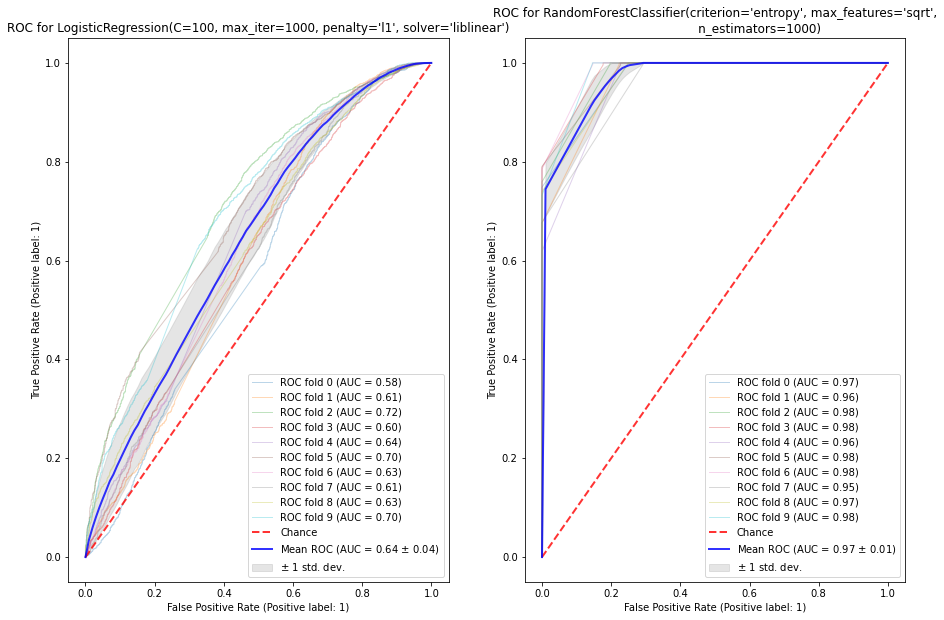

In [11]:
rcParams["figure.figsize"] = 15, 10
fig, (ax1, ax2) = plt.subplots(1,2)
plot_roc_over_n_folds(classifier=log_regression, X=X, y=y, n_splits=10, ax=ax1)
plot_roc_over_n_folds(classifier=random_forest, X=X, y=y, n_splits=10, ax=ax2)

#### Plot ROC of each model with the ROC Curve on the data for each session separately.

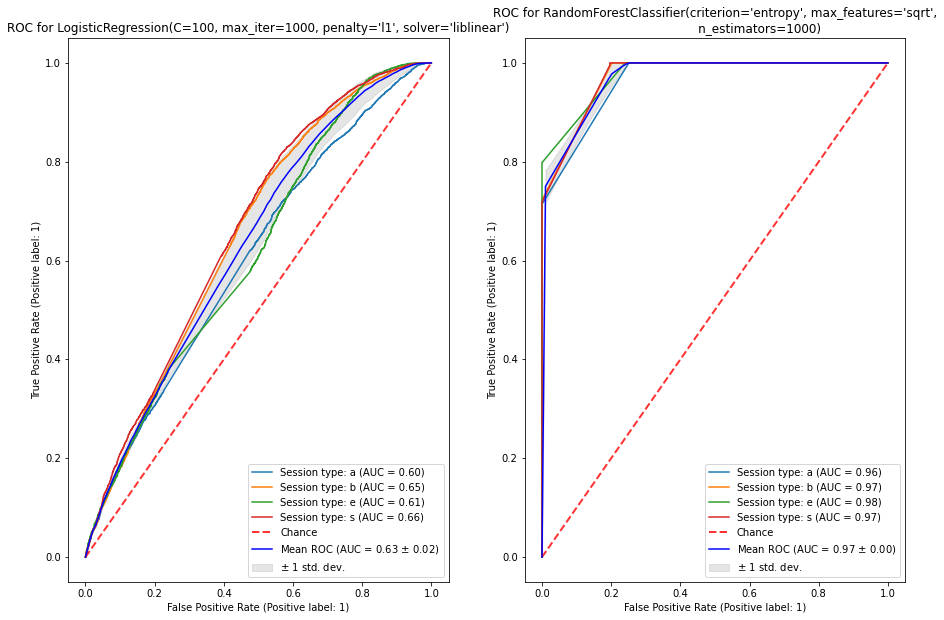

In [12]:
fig, (ax1, ax2) = plt.subplots(1,2)
plot_roc_over_sessions(classifier=log_regression, identifiers=ids, X=X, y=y, ax=ax1)
plot_roc_over_sessions(classifier=random_forest, identifiers=ids, X=X, y=y, ax=ax2)


#### Plot ROC of each model with the ROC Curve for each subject separately.


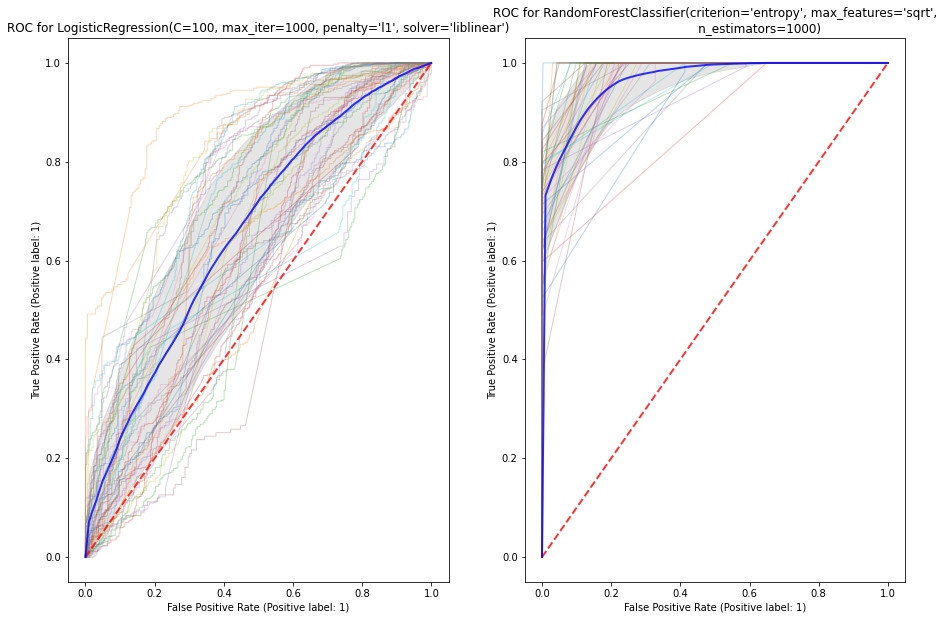

In [13]:
fig, (ax1, ax2) = plt.subplots(1,2)
plot_roc_over_subjects(classifier=log_regression, identifiers=ids, X=X, y=y, ax=ax1)
plot_roc_over_subjects(classifier=random_forest, identifiers=ids, X=X, y=y, ax=ax2)


In [28]:
table.feature_importances(data=random_forest.feature_importances_, top_n=30, feature_names=FEATURE_NAMES)

feature_name,importance
_median_-AVR,0.0331056
_mean_-AVR,0.0330545
_mean_closure_speed_mean,0.0292902
_mean_standard_lid_reopening_durations,0.0292319
_mean_standard_closure_speed_mean,0.0291273
_mean_standard_blink_duration,0.0285246
_median_+AVR,0.0280357
_median_closure_speed_mean,0.0280239
_median_standard_closure_speed_mean,0.0278234
_mean_+AVR,0.027765


In [36]:
table.feature_importances(data=log_regression.coef_[0], feature_names=FEATURE_NAMES)

feature_name,importance
_mean_closure_speed_max,8.88728
_median_closure_speed_max,6.08545
_std_closure_speed_max,5.93541
_median_standard_closure_speed_mean,5.54378
_mean_standard_closure_speed_mean,5.07528
LC,1.97772
_kurtosis_standard_closure_speed_mean,1.03265
_kurtosis_closure_speed_max,0.85453
_skew_closure_speed_mean,0.615929
_skew_standard_closure_speed_max,0.114306


In [35]:
log_regression.coef_.shape

(1, 67)